In [1]:
import numpy as np
from PIL import Image

import cv2 as cv

import tensorflow as tf
from tensorflow import keras

## Loading the Data

In [2]:
import pathlib

data_dir = pathlib.Path('D:\Project Coding\Data Science Projects\BellPepperClassifier\Data\/bell_peppers')
data_dir

WindowsPath('D:/Project Coding/Data Science Projects/BellPepperClassifier/Data/bell_peppers')

In [3]:
img_count = len(list(data_dir.glob('*/*.jpg')))
img_count

2474

In [4]:
list(data_dir.glob('*'))

[WindowsPath('D:/Project Coding/Data Science Projects/BellPepperClassifier/Data/bell_peppers/bacterial_spot'),
 WindowsPath('D:/Project Coding/Data Science Projects/BellPepperClassifier/Data/bell_peppers/healthy')]

## Data Preprocessing

In [5]:
bell_peppers_img = {
    'bacterial_spot': list(data_dir.glob('bacterial_spot/*.jpg')),
    'healthy': list(data_dir.glob('healthy/*.jpg'))
}

In [6]:
bell_peppers_img['bacterial_spot'][:5]

[WindowsPath('D:/Project Coding/Data Science Projects/BellPepperClassifier/Data/bell_peppers/bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG'),
 WindowsPath('D:/Project Coding/Data Science Projects/BellPepperClassifier/Data/bell_peppers/bacterial_spot/006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG'),
 WindowsPath('D:/Project Coding/Data Science Projects/BellPepperClassifier/Data/bell_peppers/bacterial_spot/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG'),
 WindowsPath('D:/Project Coding/Data Science Projects/BellPepperClassifier/Data/bell_peppers/bacterial_spot/01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Spot 3262.JPG'),
 WindowsPath('D:/Project Coding/Data Science Projects/BellPepperClassifier/Data/bell_peppers/bacterial_spot/0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B.Spot 9169.JPG')]

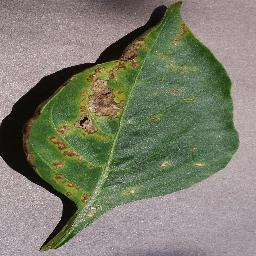

In [8]:
Image.open(str(bell_peppers_img['bacterial_spot'][0]))

In [9]:
bell_peppers_img['healthy'][:5]

[WindowsPath('D:/Project Coding/Data Science Projects/BellPepperClassifier/Data/bell_peppers/healthy/00100ffa-095e-4881-aebf-61fe5af7226e___JR_HL 7886.JPG'),
 WindowsPath('D:/Project Coding/Data Science Projects/BellPepperClassifier/Data/bell_peppers/healthy/00208a93-7687-4e8c-b79e-3138687e0f38___JR_HL 7955.JPG'),
 WindowsPath('D:/Project Coding/Data Science Projects/BellPepperClassifier/Data/bell_peppers/healthy/002f87b7-e1a5-49e5-a422-bb423630ded5___JR_HL 8068.JPG'),
 WindowsPath('D:/Project Coding/Data Science Projects/BellPepperClassifier/Data/bell_peppers/healthy/00726ad4-2569-46ce-9d4e-dbf82b14bd94___JR_HL 8686.JPG'),
 WindowsPath('D:/Project Coding/Data Science Projects/BellPepperClassifier/Data/bell_peppers/healthy/0119205b-cfac-4322-be37-dcc401fcfa11___JR_HL 8527.JPG')]

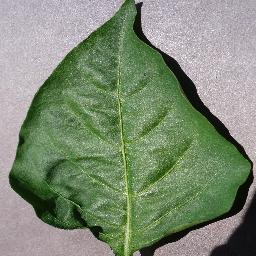

In [10]:
Image.open(str(bell_peppers_img['healthy'][0]))

In [11]:
print(len(bell_peppers_img['bacterial_spot']))
print(len(bell_peppers_img['healthy']))

997
1477


There appears to be some imbalanced in our dataset. Let's handle that

To handle this, lets just use undersample on the majority data (healthy picture) to be the same as the minority data (bacterial spot)

In [12]:
import random

undersampled_healthy = random.sample(bell_peppers_img['healthy'], len(bell_peppers_img['bacterial_spot']))

now that we have done the undersampling, lets replace the original data into our undersampled data.

In [13]:
bell_peppers_img['healthy'] = undersampled_healthy

In [14]:
print(len(bell_peppers_img['bacterial_spot']))
print(len(bell_peppers_img['healthy']))

997
997


In [15]:
labels = {
    'bacterial_spot': 1,
    'healthy': 0
}

In [16]:
X, y = [], []

for disease, images in bell_peppers_img.items():
  for image in images:
    img = cv.imread(str(image))
    resized_img = cv.resize(img, (100, 100))
    X.append(resized_img)
    y.append(labels[disease])

In [17]:
X[0]

array([[[103, 100, 115],
        [111, 108, 123],
        [ 97,  94, 109],
        ...,
        [148, 147, 163],
        [154, 153, 169],
        [150, 149, 165]],

       [[103, 100, 115],
        [128, 125, 140],
        [106, 103, 118],
        ...,
        [150, 149, 165],
        [154, 152, 168],
        [150, 149, 165]],

       [[108, 105, 120],
        [110, 107, 122],
        [110, 107, 122],
        ...,
        [158, 157, 173],
        [153, 152, 168],
        [159, 158, 174]],

       ...,

       [[149, 142, 155],
        [173, 166, 179],
        [168, 161, 174],
        ...,
        [164, 155, 168],
        [166, 157, 170],
        [161, 152, 165]],

       [[169, 161, 174],
        [180, 173, 186],
        [185, 178, 191],
        ...,
        [160, 151, 164],
        [158, 149, 162],
        [163, 154, 167]],

       [[145, 138, 151],
        [152, 145, 158],
        [154, 147, 160],
        ...,
        [168, 159, 171],
        [161, 152, 166],
        [167, 158, 171]]

In [18]:
X = np.array(X).astype('float16')/255
y = np.array(y)

In [19]:
X[0]

array([[[0.4038, 0.392 , 0.451 ],
        [0.4353, 0.4236, 0.4824],
        [0.3804, 0.3687, 0.4275],
        ...,
        [0.5806, 0.5767, 0.639 ],
        [0.604 , 0.6   , 0.6626],
        [0.5884, 0.5845, 0.647 ]],

       [[0.4038, 0.392 , 0.451 ],
        [0.502 , 0.4902, 0.549 ],
        [0.4158, 0.4038, 0.4626],
        ...,
        [0.5884, 0.5845, 0.647 ],
        [0.604 , 0.596 , 0.6587],
        [0.5884, 0.5845, 0.647 ]],

       [[0.4236, 0.4119, 0.4707],
        [0.4314, 0.4197, 0.4785],
        [0.4314, 0.4197, 0.4785],
        ...,
        [0.6196, 0.6157, 0.678 ],
        [0.6   , 0.596 , 0.6587],
        [0.6235, 0.6196, 0.682 ]],

       ...,

       [[0.5845, 0.5566, 0.608 ],
        [0.678 , 0.651 , 0.702 ],
        [0.6587, 0.6313, 0.682 ],
        ...,
        [0.643 , 0.608 , 0.6587],
        [0.651 , 0.6157, 0.6665],
        [0.6313, 0.596 , 0.647 ]],

       [[0.6626, 0.6313, 0.682 ],
        [0.706 , 0.678 , 0.7295],
        [0.7256, 0.698 , 0.749 ],
        .

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2, stratify=y)

In [21]:
from keras.preprocessing.image import ImageDataGenerator
import scipy
from scipy import ndimage

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [22]:
X.shape

(1994, 100, 100, 3)

In [30]:
model = keras.Sequential([
    # CNN
    keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(16, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    # ANN
    keras.layers.Flatten(),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [24]:
datagen.fit(X_train)

In [25]:
train_gen = datagen.flow(X_train, y_train, batch_size=32)

In [26]:
scipy.__version__

'1.11.4'

In [31]:
model.fit(train_gen, epochs=15)

Epoch 1/15
50/50 [==============================] - 18s 290ms/step - loss: 0.6912 - accuracy: 0.5204
Epoch 2/15
50/50 [==============================] - 16s 317ms/step - loss: 0.6383 - accuracy: 0.6708
Epoch 3/15
50/50 [==============================] - 14s 277ms/step - loss: 0.5424 - accuracy: 0.7398
Epoch 4/15
50/50 [==============================] - 8s 164ms/step - loss: 0.4161 - accuracy: 0.8238
Epoch 5/15
50/50 [==============================] - 9s 174ms/step - loss: 0.3568 - accuracy: 0.8502
Epoch 6/15
50/50 [==============================] - 9s 169ms/step - loss: 0.3230 - accuracy: 0.8658
Epoch 7/15
50/50 [==============================] - 9s 172ms/step - loss: 0.3247 - accuracy: 0.8646
Epoch 8/15
50/50 [==============================] - 9s 179ms/step - loss: 0.2893 - accuracy: 0.8796
Epoch 9/15
50/50 [==============================] - 9s 177ms/step - loss: 0.3021 - accuracy: 0.8790
Epoch 10/15
50/50 [==============================] - 9s 180ms/step - loss: 0.2494 - accuracy: 0.8

In [32]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 1s 28ms/step - loss: 0.1060 - accuracy: 0.9624


[0.10598554462194443, 0.9624060392379761]

0.96 accuracy on the test data is good

now, lets see the classification report

In [33]:
from sklearn.metrics import classification_report

yp = model.predict(X_test)

13/13 [==============================] - 1s 22ms/step


In [37]:
yp[:5]

array([[0.47106314],
       [0.20844455],
       [0.9692819 ],
       [0.01496437],
       [0.10033767]], dtype=float32)

In [35]:
y_test[:5]

array([1, 1, 1, 0, 0])

In [39]:
y_pred = [round(i[0]) for i in yp]

In [40]:
y_pred[:5]

[0, 0, 1, 0, 0]

In [41]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       200
           1       0.98      0.94      0.96       199

    accuracy                           0.96       399
   macro avg       0.96      0.96      0.96       399
weighted avg       0.96      0.96      0.96       399



Our model has a really good precision, recall, and f1-score. So, i think we can confidedntly use this model for our further prediction

In [43]:
keras.models.save_model(model, 'model.h5')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15864\3610667696.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model, 'model.h5')
